# Lab 1
### William Olsen

In this lab we will be becoming familiar with git & Github as well as some distributions and probabilities.

In [1]:
# first lets import the required packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

## A Little Statistics

### Part 1

Recall that in physics we perform a translation and represent probabilities using `sigmas`.  Let us explore this translation using the standard normal distribution as our data source (which is also the source used to determine the related sigma value for a given probability).

We would like to see what probabilities that we get for certain sigma values.  We often would like to look at multiple values of sigma when we are observing the related probabilities.  We will use $\sigma = 0.77, 1.17, 2.93$ as our values - these values are refered to as our _**canidates**_.  Looking up these values in the z-table, our expectation is that we will find probabilities of 0.77935, 0.87900, 0.99831 for the sigma values respectively.

Now to determine the probability of a specific value we must integrate the probability density function for the normal distribution.  This integration is equivalent to calculating the value of the cumulative distribution function, or the cdf.

In [2]:
# specify the sigma values to try
sigma_1 = 0.77
sigma_2 = 1.17
sigma_3 = 2.93

# calcualate the probabilities associated with each value
prob_sigma_1 = stats.norm.cdf(sigma_1)
prob_sigma_2 = stats.norm.cdf(sigma_2)
prob_sigma_3 = stats.norm.cdf(sigma_3)

print(f'Probability = {prob_sigma_1:.5f} for Sigma = {sigma_1:.2f}')
print(f'Probability = {prob_sigma_2:.5f} for Sigma = {sigma_2:.2f}')
print(f'Probability = {prob_sigma_3:.5f} for Sigma = {sigma_3:.2f}')

Probability = 0.77935 for Sigma = 0.77
Probability = 0.87900 for Sigma = 1.17
Probability = 0.99831 for Sigma = 2.93


Comparing the above values to the expected values from the z-table we see that the cdf calculation is indeed accurate and we got the same values.

Now that we have the probabilities above for each value of sigma we will explore translating this probability back into a sigma.  As we are drawing our data from the normal distribution and we calculate sigma using the normal distribution we expect that when we calculate the sigma from our probabilities we will recover the original sigma values used previously in order to calculate the probability by evaluating the cdf.

In [3]:
# using the previously calculated probabilities lets determine what sigma was found for that probability
sigma_1_prime = stats.norm.ppf(prob_sigma_1)
sigma_2_prime = stats.norm.ppf(prob_sigma_2)
sigma_3_prime = stats.norm.ppf(prob_sigma_3)

print(f'For Probability = {prob_sigma_1:.5f} got Sigma = {sigma_1_prime:.2f}.  Expected Sigma = {sigma_1:.2f}.')
print(f'For Probability = {prob_sigma_2:.5f} got Sigma = {sigma_2_prime:.2f}.  Expected Sigma = {sigma_2:.2f}.')
print(f'For Probability = {prob_sigma_3:.5f} got Sigma = {sigma_3_prime:.2f}.  Expected Sigma = {sigma_3:.2f}.')

For Probability = 0.77935 got Sigma = 0.77.  Expected Sigma = 0.77.
For Probability = 0.87900 got Sigma = 1.17.  Expected Sigma = 1.17.
For Probability = 0.99831 got Sigma = 2.93.  Expected Sigma = 2.93.


We see above that the conversion from the data source to a probability and then to a sigma is correct and we recover the same value of sigma.  This was our expectation as we originally drew our values from the normal distribution so the same value should be recovered.  As we continue we will no longer be drawing our data from the normal distribution so the sigma value will, generally, not match the _**canidate**_ value as it does here.

Note that if we had used the survival function (defined as 1-cdf) instead of the cummulative distribution function we would have gotten the same values of sigma except they would have been negative.  It is important to note that the normal gaussian distribution is symmetric about zero so the negative values are equivalent to the corresponding postive value.  Thus overall we can consider only positive sigmas.

### Part 2

Next we will explore a continous distribution.  Here we will be looking at the Rayleigh distribution specifically.  This distribution is a continuous distribution for a collection of non-negative random variables.  Commonly Rayleigh distributions arise in nature when the components of a vector are related to the magnitude of said vector.  Addtionally the Rayleigh distribution is equivalent to the square root of the squared sum of two Gaussian random variables, mathematically: $\sqrt{X^2_1 + X^2_2}$ where $X_1, X_2$ are Gaussian random variables.

The Rayleigh distribution has the following functions of interest:

$$\text{pdf} = \frac{x}{\sigma^2} e^{-x^2 / (2\sigma^2)} \text{, cdf} = 1 - e^{-x^2 / (2\sigma^2)}$$

Where pdf is the _probability density function_ and cdf is the _cumulative distribution function_ which are both only defined when $x \ge 0$.

We will now make an analytic plot of the function and of 100k random draws from the function to see if the central limit theorem applys when our data is drawn from the Rayleigh distribution.

In [4]:
# general graphing setup
plt.rcParams["figure.figsize"] = (15,10)

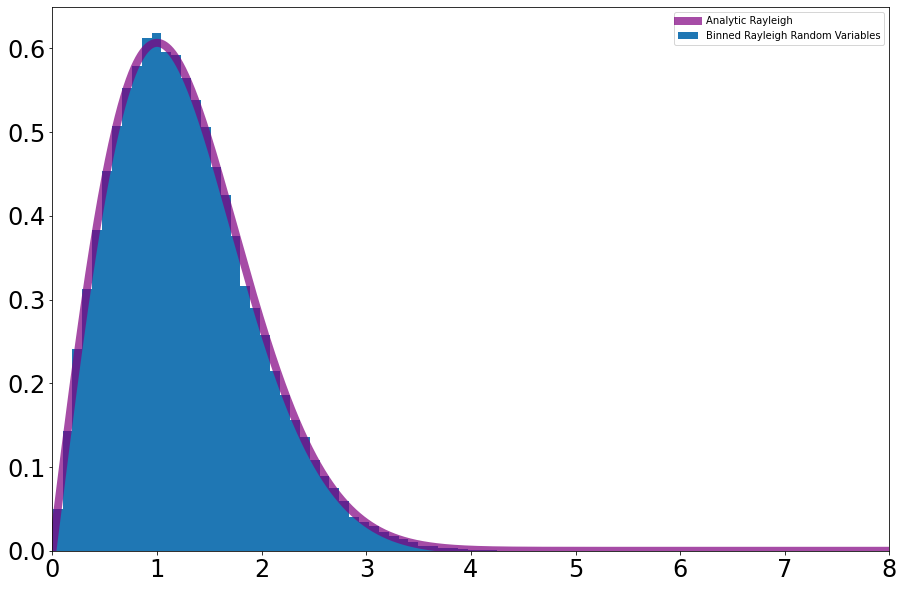

In [5]:
# lets first draw the the 100k points from the distribution
draw = stats.rayleigh.rvs(size=100000)

# now lets group those points into bins and normalize
fig, ax = plt.subplots(1, 1)
ax.hist(draw, bins=50, density=True, label='Binned Rayleigh Random Variables')

# lets plot the analytical function
limits = [0, 8]
x = np.linspace(limits[0], limits[1], 10000)
plt.plot(x, stats.rayleigh.pdf(x), linewidth=8, alpha=0.7, label='Analytic Rayleigh', color='purple')

# adjust information about the graph
plt.tick_params(labelsize=24)
plt.xlim(limits)
plt.legend()

plt.show()

From the above we see that our data does indeed follow the central limit theorem and, if we were to draw more data, the histogram would converge closer and closer to the true analytic function.  

Lets look at the same plot but in semi-log space to get a better view of the data and it's behavior at the edge cases.

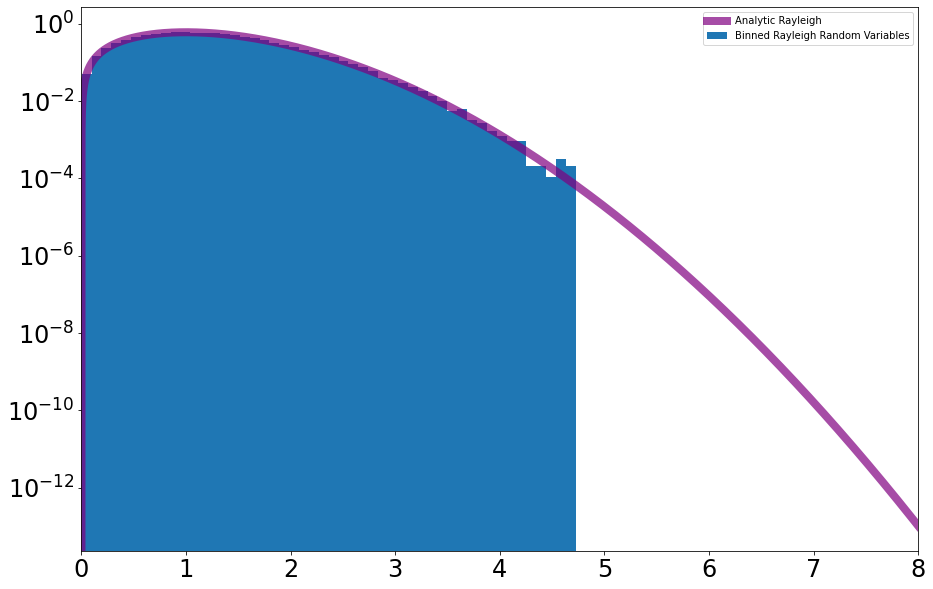

In [6]:
# lets group the previous points into bins and normalize
fig, ax = plt.subplots(1, 1)
ax.hist(draw, bins=50, density=True, label='Binned Rayleigh Random Variables')

# lets plot the analytical function
limits = [0, 8]
x = np.linspace(limits[0], limits[1], 10000)
plt.plot(x, stats.rayleigh.pdf(x), linewidth=8, alpha=0.7, label='Analytic Rayleigh', color='purple')

# adjust information about the graph
plt.yscale('log')
plt.tick_params(labelsize=24)
plt.xlim(limits)
plt.legend()

plt.show()

If we were to plot the Guassian distribution on a semi-log plot we would find exactly an upside down parabola.  As can be seen above we do not see a perfect parabola which was as expected because our data was drawn from the Rayleigh distribution rather than from the Guassian.  In the future we will use the semi-log plot to help us determine the true distribution for the data we are observing.

### Part 3

Suppose that we have a signal-free source which we are collecting data from.  Further suppose that this source follows the Rayleigh distribution.

Now let's suppose that we have observed a signal with value $3.5$.  

I would like to ask the following question:

> What is the probability that my signal-free source produces a signal that is equally or more signal like than the signal I have observed?

Mathematically, this question can be represetned with the following integral:

$$\text{Probability} = \int_{3.5}^{\infty} \text{pdf}(x) dx = \int_{3.5}^{\infty} \frac{x}{\sigma^2} e^{-x^2 / (2\sigma^2)} dx$$

Now let us calculate this probability...

In [7]:
# let's calculate the above integral
canidate = 7
canidate_probability = stats.rayleigh.cdf(canidate)
background_canidate_probability = stats.rayleigh.sf(canidate)
print(f'Given caidate = {canidate}, Probability casued by the background = {background_canidate_probability}')

# now lets convert our probability to a sigma
canidate_sigma = stats.norm.ppf(canidate_probability)
print(f'Sigma = {canidate_sigma:.5f}')


Given caidate = 7, Probability casued by the background = 2.289734845645553e-11
Sigma = 6.58400


From the above we see that the probability that the background produces a result that is equal or more signal like than our observed signal of 7 is $6.58400\sigma$.

### Part 4

Now we will try various values of sigma and we will see how the results compare. TODO

TODO 

In [18]:
# let us define a function to take a canidate and calculate and print the associated probability and sigma.
def determine_sigma(canidate):
    # let's calculate the probability
    canidate_probability = stats.rayleigh.cdf(canidate)
    background_canidate_probability = stats.rayleigh.sf(canidate)

    # now lets convert our probability to a sigma
    canidate_sigma = stats.norm.ppf(canidate_probability)
    print(f'Given caidate = {canidate:0.3f}, Sigma = {canidate_sigma:.5f} where the Probability casued by the background = {background_canidate_probability}')

# test a few values and then describe your obsersations
canidates = np.linspace(1, 7, 15) # look at 15 values
for canidate in canidates:
    determine_sigma(canidate)

Given caidate = 1.000, Sigma = -0.27029 where the Probability casued by the background = 0.6065306597126334
Given caidate = 1.429, Sigma = 0.35726 where the Probability casued by the background = 0.360447788597821
Given caidate = 1.857, Sigma = 0.92200 where the Probability casued by the background = 0.17826397958504792
Given caidate = 2.286, Sigma = 1.45115 where the Probability casued by the background = 0.0733696513683829
Given caidate = 2.714, Sigma = 1.95774 where the Probability casued by the background = 0.025130488985274403
Given caidate = 3.143, Sigma = 2.44897 where the Probability casued by the background = 0.007163364470919217
Given caidate = 3.571, Sigma = 2.92918 where the Probability casued by the background = 0.0016992793655526586
Given caidate = 4.000, Sigma = 3.40119 where the Probability casued by the background = 0.00033546262790251185
Given caidate = 4.429, Sigma = 3.86690 where the Probability casued by the background = 5.5113137010524554e-05
Given caidate = 4.857

From the results above we can see that around a canidate value 4.5 it becomes incredibly unlikely that our canidate resulted from the background noise.  Smaller canidate values however are much more likely to have been casued due to backgroud noise.  This result is entirly dependant on the question that we are asking and in this situation we find that a higher canidate value leads corresponds to a lower probability that the canidate was caused due to the background noise.

## Non-continuous distributions

### Part 1

TODO:
1) choose a distrubution
2) plot that distribution with multiple different parameter values and explain the features of the distribution based on the observed behaviors
3) define a hyptothetical question (clearly stated) as previously in part 3 of the first part of the lab and calculate the associated probability for the question
4) discuss the implications for experiments provided that the distribution values and thus the probabilities and thus the sigmas are discrete values
5) think and explain why it makes sense for certain things to be continuous and others to be continuous: e.g., the input to the distribution is continuous while the result is discrete.